# Problem 2: CART-RF-ANN
### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets. 


### Importing Data and Performing Basic EDA

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#load data
data_insurance_frame = pd.read_csv('insurance_part2_data.csv')

In [3]:
#check data
data_insurance_frame.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
#spread value counts
print('Agency_code Distribution \n',data_insurance_frame.Agency_Code.value_counts())
print('\n')
print('Type Distribution \n',data_insurance_frame.Type.value_counts())
print('\n')
print('Claimed Distribution \n',data_insurance_frame.Claimed.value_counts())
print('\n')
print('Channel Distribution \n',data_insurance_frame.Channel.value_counts())
print('\n')
print('Product Distribution Name \n',data_insurance_frame.Product_Name.value_counts())
print('\n')
print('Destination Distribution \n',data_insurance_frame.Destination.value_counts())

Agency_code Distribution 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type Distribution 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed Distribution 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Channel Distribution 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Product Distribution Name 
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product_Name, dtype: int64


Destination Distribution 
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


In [5]:
#columns 
data_insurance_frame.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product_Name', 'Destination'],
      dtype='object')

In [6]:
#shape
data_insurance_frame.shape 

(3000, 10)

In [7]:
#info
data_insurance_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product_Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [8]:
#describe
data_insurance_frame.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [9]:
#Checking the count of duplicate counts
dups = data_insurance_frame.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_insurance_frame[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [10]:
#shewness check
skew = data_insurance_frame.skew() 
print("Skewness of the Dataset:\n",skew)

Skewness of the Dataset:
 Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64


In [11]:
cv = data_insurance_frame.std()/data_insurance_frame.mean()
print(cv)

Age          0.274698
Commision    1.753809
Duration     1.915011
Sales        1.174009
dtype: float64


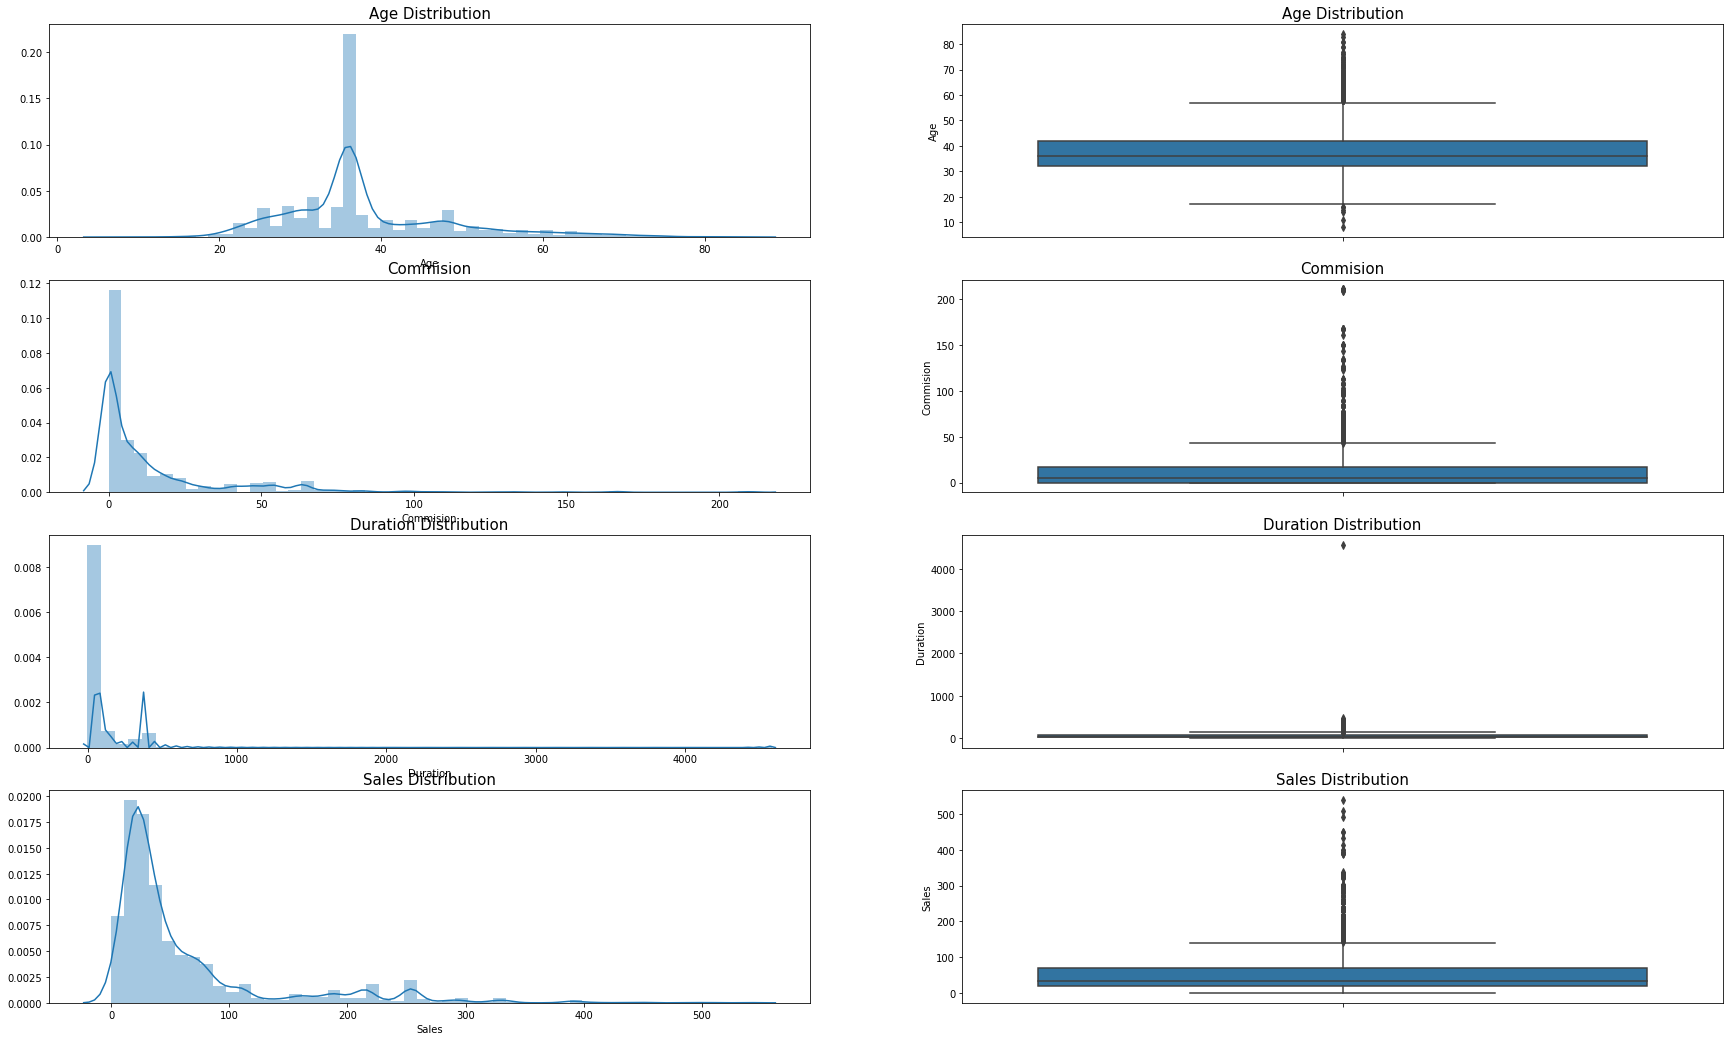

In [12]:
#univariate analysis
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(30, 18)

a = sns.distplot(data_insurance_frame['Age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=15)
a = sns.boxplot(data_insurance_frame['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Distribution",fontsize=15)

a = sns.distplot(data_insurance_frame['Commision'] , ax=axes[1][0])
a.set_title("Commision",fontsize=15)
a = sns.boxplot(data_insurance_frame['Commision'] , orient = "v" , ax=axes[1][1])
a.set_title("Commision",fontsize=15)

a = sns.distplot(data_insurance_frame['Duration'] , ax=axes[2][0])
a.set_title("Duration Distribution",fontsize=15)
a = sns.boxplot(data_insurance_frame['Duration'] , orient = "v" , ax=axes[2][1])
a.set_title("Duration Distribution",fontsize=15)

a = sns.distplot(data_insurance_frame['Sales'] , ax=axes[3][0])
a.set_title("Sales Distribution",fontsize=15)
a = sns.boxplot(data_insurance_frame['Sales'] , orient = "v" , ax=axes[3][1])
a.set_title("Sales Distribution",fontsize=15)


plt.show()

In [13]:
#invalid data removal 
data_insurance_frame.loc[data_insurance_frame['Duration'] < 1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,-1,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


In [14]:
data_insurance_frame['Duration'].replace(0,data_insurance_frame['Duration'].median(),inplace=True)

In [15]:
data_insurance_frame['Duration'].replace(-1,data_insurance_frame['Duration'].median(),inplace=True)

In [16]:
data_insurance_frame['Duration'].replace(-1,data_insurance_frame['Duration'].median(),inplace=True)

In [17]:
#null value check
data_insurance_frame.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product_Name    0
Destination     0
dtype: int64

In [18]:
#covariance check
data_insurance_frame.cov()

,Age,Commision,Duration,Sales
Age,109.485214,18.055091,42.633224,29.201372
Commision,18.055091,649.304524,1610.310722,1381.552303
Duration,42.633224,1610.310722,17967.226965,5299.485977
Sales,29.201372,1381.552303,5299.485977,5003.292182


In [19]:
#correlation check
data_insurance_frame.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030397,0.039455
Commision,0.067717,1.000000,0.471460,0.766505
Duration,0.030397,0.471460,1.000000,0.558940
Sales,0.039455,0.766505,0.558940,1.000000


In [20]:
data_insurance_frame

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7.0,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34.0,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3.0,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4.0,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53.0,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364.0,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5.0,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54.0,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39.0,30.55,Bronze Plan,ASIA


In [21]:
data_insurance_frame_corr = data_insurance_frame[['Age','Commision','Duration','Sales']]

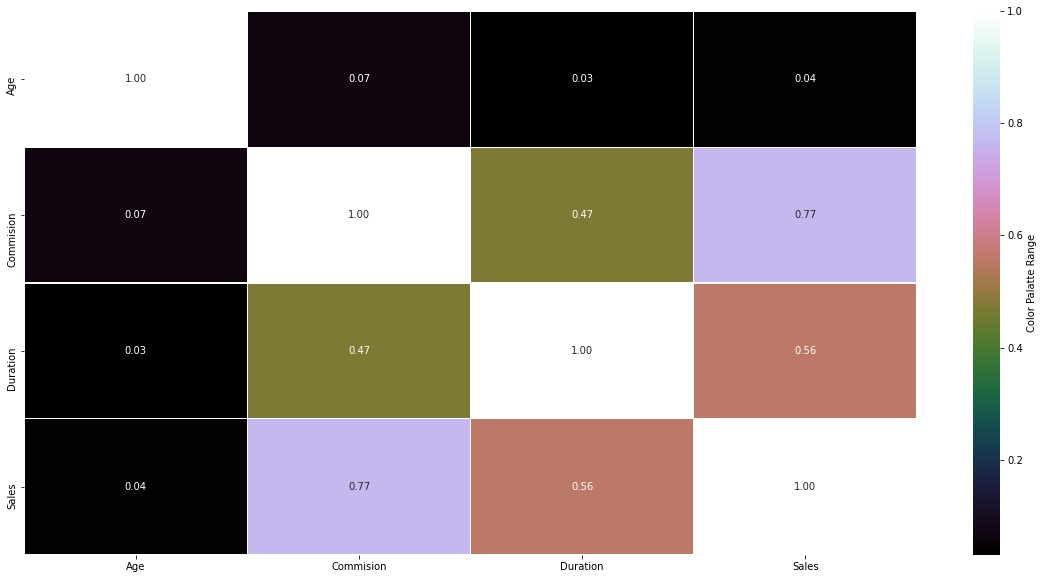

In [22]:
# Heatmap generation
fig,ax = plt.subplots(figsize=(20,10))   
sns.heatmap(data_insurance_frame_corr.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="cubehelix",cbar_kws={'label': 'Color Palatte Range'})
plt.show()

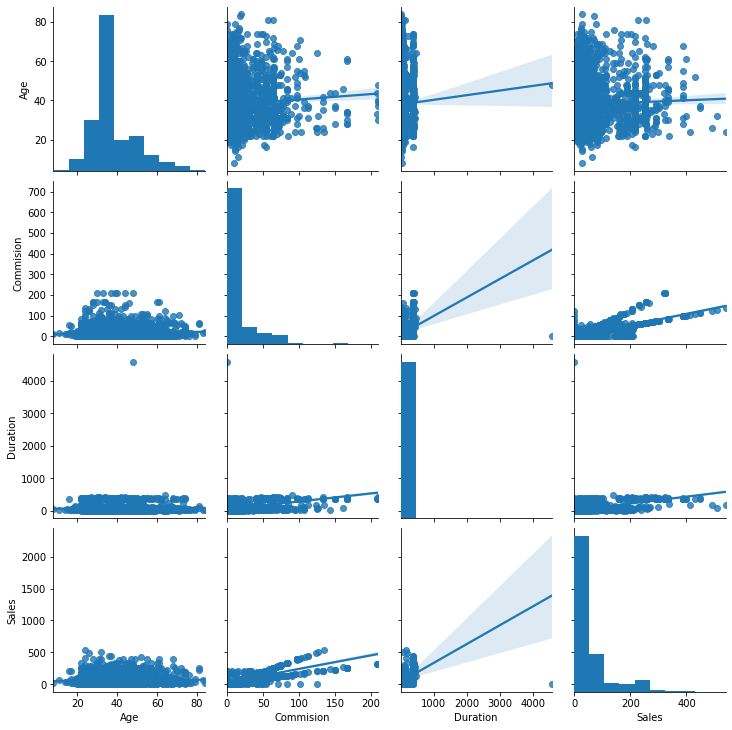

In [23]:
#Bivariate analysis - Pair plot
sns.pairplot(data_insurance_frame, kind="reg")  
plt.show()

In [24]:
#before categorical conversion
data_insurance_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product_Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 234.5+ KB


In [25]:
for feature in data_insurance_frame.columns: 
    if data_insurance_frame[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data_insurance_frame[feature].unique()))
        print(pd.Categorical(data_insurance_frame[feature].unique()).codes)
        data_insurance_frame[feature] = pd.Categorical(data_insurance_frame[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product_Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [26]:
#after categorical conversion
data_insurance_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product_Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 111.5 KB


In [27]:
#duplicates drop
data_insurance_frame = data_insurance_frame.drop_duplicates()

In [28]:
#check to see the confirmation
dups = data_insurance_frame.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_insurance_frame[dups].head(10)

Number of duplicate rows = 0


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination


In [29]:
data_insurance_frame_woutliers = data_insurance_frame.copy()

In [30]:
#outlier removal function
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [31]:
#removing outliers
lratio,uratio=remove_outlier(data_insurance_frame_woutliers['Age'])
data_insurance_frame_woutliers['Age']=np.where(data_insurance_frame_woutliers['Age']>uratio,uratio,data_insurance_frame_woutliers['Age'])
data_insurance_frame_woutliers['Age']=np.where(data_insurance_frame_woutliers['Age']<lratio,lratio,data_insurance_frame_woutliers['Age'])

lraxis,uraxis=remove_outlier(data_insurance_frame_woutliers['Commision'])
data_insurance_frame_woutliers['Commision']=np.where(data_insurance_frame_woutliers['Commision']>uraxis,uraxis,data_insurance_frame_woutliers['Commision'])
data_insurance_frame_woutliers['Commision']=np.where(data_insurance_frame_woutliers['Commision']<lraxis,lraxis,data_insurance_frame_woutliers['Commision'])

lraspect,uraspect=remove_outlier(data_insurance_frame_woutliers['Duration'])
data_insurance_frame_woutliers['Duration']=np.where(data_insurance_frame_woutliers['Duration']>uraspect,uraspect,data_insurance_frame_woutliers['Duration'])
data_insurance_frame_woutliers['Duration']=np.where(data_insurance_frame_woutliers['Duration']<lraspect,lraspect,data_insurance_frame_woutliers['Duration'])

lrscaled_var,urscaled_var=remove_outlier(data_insurance_frame_woutliers['Sales'])
data_insurance_frame_woutliers['Sales']=np.where(data_insurance_frame_woutliers['Sales']>urscaled_var,urscaled_var,data_insurance_frame_woutliers['Sales'])
data_insurance_frame_woutliers['Sales']=np.where(data_insurance_frame_woutliers['Sales']<lrscaled_var,lrscaled_var,data_insurance_frame_woutliers['Sales'])



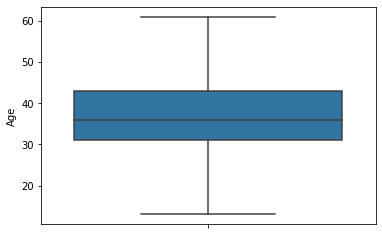

In [32]:
a = sns.boxplot(data_insurance_frame_woutliers['Age'] , orient = "v" )

In [33]:
#class imbalance check
data_insurance_frame_woutliers.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [34]:
data_insurance_frame.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

# 2.2  Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [35]:
#Split the data into test and train
X = data_insurance_frame.drop("Claimed", axis=1)
y = data_insurance_frame.pop("Claimed")

#the one withour outliers
X_a = data_insurance_frame_woutliers.drop("Claimed", axis=1)
y_a = data_insurance_frame_woutliers.pop("Claimed")

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [37]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=.30, random_state=1)

In [38]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',y_train.shape)
print('test_labels',y_test.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [39]:
print('X_train',X_train_a.shape)
print('X_test',X_test_a.shape)
print('train_labels',y_train_a.shape)
print('test_labels',y_test_a.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


# DECISION TREE from dataset that has not been treated with outliers

In [40]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [41]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('Insurance_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=Insurance_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

Insurance_Tree_File.close()


In [43]:
#variable importance before pruning the model
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.263906
Sales         0.231339
Age           0.207457
Agency_Code   0.169498
Commision     0.059577
Product_Name  0.033301
Destination   0.031015
Channel       0.003908
Type          0.000000


In [44]:
#predicting
y_predict = dt_model.predict(X_test)

In [45]:
y_predict

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,

In [46]:
param_grid_1 = {
    'max_depth': [4,5,6,7,8],
    'min_samples_leaf': [30,35, 40,45,50],
    'min_samples_split': [60,75, 90,100,120,150]
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search_1 = GridSearchCV(estimator = dt_model, param_grid = param_grid_1, cv = 3)

In [47]:
grid_search_1.fit(X_train, y_train)

In [48]:
grid_search_1.best_params_

In [49]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf=30, min_samples_split=120, random_state=1)
reg_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=120,
                       random_state=1)

In [51]:
#variable importance after pruning the model
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                   Imp
Agency_Code   0.579301
Sales         0.294225
Product_Name  0.045689
Commision     0.043732
Destination   0.020055
Duration      0.016999
Age           0.000000
Type          0.000000
Channel       0.000000


In [52]:
y_train_predict_dt = reg_dt_model.predict(X_train)
y_test_predict_dt = reg_dt_model.predict(X_test)

In [53]:
y_train_predict_dt_a = reg_dt_model.predict_proba(X_train)
y_test_predict_dt_a = reg_dt_model.predict_proba(X_test)


In [54]:
pd.DataFrame(y_test_predict_dt_a)

,0,1
0,0.352941,0.647059
1,0.932673,0.067327
2,0.274112,0.725888
3,0.714744,0.285256
4,0.714744,0.285256
...,...,...
854,0.837134,0.162866
855,0.837134,0.162866
856,0.424603,0.575397
857,0.837134,0.162866


In [55]:
#training accuracy
reg_dt_model.score(X_train,y_train)

0.7772227772227772

In [56]:
#testing accuracy
reg_dt_model.score(X_test,y_test)

0.7788125727590222

# Decision tree from Dataset that has been treated with outliers

In [57]:
dt_model_wo = DecisionTreeClassifier(criterion = 'gini' )

In [58]:
dt_model_wo.fit(X_train_a, y_train_a)

DecisionTreeClassifier()

In [59]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File_best_wo = open('Insurance_Tree_File_best_wo.dot','w')
dot_data = tree.export_graphviz(reg_dt_model_wo, 
                                out_file=Insurance_Tree_File_best_wo, 
                                feature_names = list(X_train_a), 
                                class_names = list(train_char_label))

Insurance_Tree_File_best_wo.close()


In [60]:
print (pd.DataFrame(dt_model_wo.feature_importances_, columns = ["Imp"], index = X_train_a.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.252951
Sales         0.224872
Age           0.199604
Agency_Code   0.176076
Commision     0.063049
Product_Name  0.043267
Destination   0.033023
Channel       0.005303
Type          0.001857


In [61]:
param_grid_1 = {
    'max_depth': [4,5,6,7,8],
    'min_samples_leaf': [30,35, 40,45,50],
    'min_samples_split': [60,75, 90,100,120,150]
}

dt_model_wo = DecisionTreeClassifier(random_state=1)

grid_search_1 = GridSearchCV(estimator = dt_model_wo, param_grid = param_grid_1, cv = 3)

In [62]:
grid_search_1.fit(X_train_a, y_train_a)

In [63]:
grid_search_1.best_params_

In [64]:
reg_dt_model_wo = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf=30, min_samples_split=120, random_state=1)
reg_dt_model_wo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=120,
                       random_state=1)

In [66]:
print (pd.DataFrame(reg_dt_model_wo.feature_importances_, columns = ["Imp"], index = X_train_a.columns).sort_values('Imp',ascending=False))


                   Imp
Agency_Code   0.579301
Sales         0.294225
Product_Name  0.045689
Commision     0.043732
Destination   0.020055
Duration      0.016999
Age           0.000000
Type          0.000000
Channel       0.000000


In [67]:
y_train_predict_dt_wo = reg_dt_model_wo.predict(X_train_a)
y_test_predict_dt_wo = reg_dt_model_wo.predict(X_test_a)

In [68]:
y_train_predict_dt_a_wo = reg_dt_model_wo.predict_proba(X_train_a)
y_test_predict_dt_a_wo = reg_dt_model_wo.predict_proba(X_test_a)

In [69]:
pd.DataFrame(y_test_predict_dt_a_wo)

,0,1
0,0.352941,0.647059
1,0.932673,0.067327
2,0.274112,0.725888
3,0.714744,0.285256
4,0.714744,0.285256
...,...,...
854,0.837134,0.162866
855,0.837134,0.162866
856,0.424603,0.575397
857,0.837134,0.162866


In [70]:
reg_dt_model_wo.score(X_train_a,y_train_a)

0.7772227772227772

In [71]:
reg_dt_model_wo.score(X_test_a,y_test_a)

0.7788125727590222

# RANDOM FOREST CLASSIFIER without treating outliers

In [72]:
random_state=[1,23,42,50,100,0]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train,y_train)
    print("The random state score of " +str(i)+ " is:",rf.oob_score_)

The random state score of 1 is: 0.7402597402597403
The random state score of 23 is: 0.7292707292707292
The random state score of 42 is: 0.7272727272727273
The random state score of 50 is: 0.7232767232767233
The random state score of 100 is: 0.7247752247752248
The random state score of 0 is: 0.7247752247752248


In [73]:
param_grid_2 = {
    'max_depth': [5,6,7],
    'max_features': [7,8,9],
    'min_samples_leaf': [20, 25,30, 50],
    'min_samples_split': [45, 60,75,80],
    'n_estimators': [101,201,301]
}

rfcl = RandomForestClassifier(random_state = 1)
rfcl.fit(X_train, y_train)

grid_search_2 = GridSearchCV(estimator = rfcl, param_grid = param_grid_2, cv = 3)

In [74]:
grid_search_2.fit(X_train, y_train)

In [75]:
grid_search_2.best_params_

In [76]:
best_grid_2 = grid_search_2.best_estimator_
best_grid_2

In [77]:
reg_rf_model = RandomForestClassifier(n_estimators = 201, oob_score = True, max_depth = 7,min_samples_leaf = 20 , min_samples_split = 45 ,max_features = 7,random_state = 1)
reg_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=7, min_samples_leaf=20,
                       min_samples_split=45, n_estimators=201, oob_score=True,
                       random_state=1)

In [78]:
y_train_predict_rf = reg_rf_model.predict(X_train)
y_test_predict_rf = reg_rf_model.predict(X_test)

In [79]:
y_train_predict_rf_a = reg_rf_model.predict_proba(X_train)
y_test_predict_rf_a = reg_rf_model.predict_proba(X_test)

In [80]:
print (pd.DataFrame(reg_rf_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.388446
Sales         0.224273
Product_Name  0.159992
Duration      0.085072
Commision     0.073139
Age           0.054333
Destination   0.008838
Type          0.005907
Channel       0.000000


In [81]:
pd.DataFrame(y_test_predict_rf_a)

,0,1
0,0.506865,0.493135
1,0.927821,0.072179
2,0.317556,0.682444
3,0.805882,0.194118
4,0.743905,0.256095
...,...,...
854,0.719971,0.280029
855,0.887161,0.112839
856,0.560233,0.439767
857,0.925126,0.074874


In [82]:
reg_rf_model.score(X_train,y_train)

0.7927072927072927

In [83]:
reg_rf_model.oob_score_

0.7677322677322678

In [84]:
reg_rf_model.score(X_test,y_test)

0.7823050058207218

# RANDOM FOREST CLASSIFIER after treating outliers

In [85]:
param_grid_2_wo = {
    'max_depth': [5,6,7],
    'max_features': [7,8,9],
    'min_samples_leaf': [20, 25,30, 50],
    'min_samples_split': [45, 60,75,80],
    'n_estimators': [101,201,301]
}

rfcl = RandomForestClassifier(random_state = 1)
rfcl.fit(X_train_a, y_train_a)

grid_search_2_wo = GridSearchCV(estimator = rfcl, param_grid = param_grid_2_wo, cv = 3)

In [86]:
grid_search_2_wo.fit(X_train_a, y_train_a)

In [87]:
grid_search_2_wo.best_params_

In [88]:
best_grid_2_wo = grid_search_2.best_estimator_
best_grid_2_wo

In [89]:
reg_rf_model_wo = RandomForestClassifier(n_estimators = 201, oob_score = True, max_depth = 7,min_samples_leaf = 20 , min_samples_split = 45 ,max_features = 7,random_state = 1)
reg_rf_model_wo.fit(X_train_a, y_train_a)

RandomForestClassifier(max_depth=7, max_features=7, min_samples_leaf=20,
                       min_samples_split=45, n_estimators=201, oob_score=True,
                       random_state=1)

In [90]:
y_train_predict_rf_wo = reg_rf_model_wo.predict(X_train_a)
y_test_predict_rf_wo = reg_rf_model_wo.predict(X_test_a)

In [91]:
y_train_predict_rf_a_wo = reg_rf_model_wo.predict_proba(X_train_a)
y_test_predict_rf_a_wo = reg_rf_model_wo.predict_proba(X_test_a)

In [92]:
print (pd.DataFrame(reg_rf_model_wo.feature_importances_, columns = ["Imp"], index = X_train_a.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.392188
Sales         0.220123
Product_Name  0.164582
Duration      0.081160
Commision     0.065718
Age           0.060216
Destination   0.010052
Type          0.005960
Channel       0.000000


In [93]:
pd.DataFrame(y_test_predict_rf_a_wo)

,0,1
0,0.517434,0.482566
1,0.931667,0.068333
2,0.315897,0.684103
3,0.803175,0.196825
4,0.732649,0.267351
...,...,...
854,0.712417,0.287583
855,0.892580,0.107420
856,0.560748,0.439252
857,0.927356,0.072644


In [94]:
reg_rf_model_wo.score(X_train_a,y_train_a)

0.7937062937062938

In [95]:
reg_rf_model_wo.oob_score_

0.7667332667332667

In [96]:
reg_rf_model_wo.score(X_test_a,y_test_a)

0.7846332945285215

# MLP CLASSIFIER (ARTIFICIAL NEURAL NETWORK)

In [97]:
from sklearn.neural_network import MLPClassifier

In [98]:
sc = StandardScaler() 
X_train_mlp = sc.fit_transform(X_train_a) 
X_test_mlp = sc.transform (X_test_a)

In [99]:
param_grid_3 = {
    'hidden_layer_sizes': [(500,500,500),(200,200)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01,0.001,0.0001],
    'max_iter' : [150, 300, 500]
}

mlp = MLPClassifier(random_state = 1)
mlp.fit(X_test_mlp, y_test)

grid_search_3 = GridSearchCV(estimator = mlp, param_grid = param_grid_3, cv = 10)

In [100]:
grid_search_3.fit(X_train_mlp, y_train_a)

In [101]:
grid_search_3.best_params_

In [102]:
best_grid_3 = grid_search_3.best_estimator_

In [103]:
best_grid_3

In [104]:
clf = MLPClassifier(hidden_layer_sizes=(500,500,500), activation ='relu',max_iter = 150,solver = 'adam',verbose = True,random_state = 1, tol = 0.0001 )

In [105]:
clf.fit(X_train_mlp,y_train_a)

Iteration 1, loss = 0.56809143
Iteration 2, loss = 0.51577142
Iteration 3, loss = 0.50906769
Iteration 4, loss = 0.51256193
Iteration 5, loss = 0.52810011
Iteration 6, loss = 0.50507050
Iteration 7, loss = 0.52298306
Iteration 8, loss = 0.50907322
Iteration 9, loss = 0.49609533
Iteration 10, loss = 0.51395561
Iteration 11, loss = 0.50234983
Iteration 12, loss = 0.49939470
Iteration 13, loss = 0.50375679
Iteration 14, loss = 0.49366804
Iteration 15, loss = 0.48120722
Iteration 16, loss = 0.48120922
Iteration 17, loss = 0.47744569
Iteration 18, loss = 0.49438574
Iteration 19, loss = 0.48344140
Iteration 20, loss = 0.47366120
Iteration 21, loss = 0.47016667
Iteration 22, loss = 0.46772697
Iteration 23, loss = 0.47371331
Iteration 24, loss = 0.49191970
Iteration 25, loss = 0.47835185
Iteration 26, loss = 0.46986002
Iteration 27, loss = 0.46629166
Iteration 28, loss = 0.46733437
Iteration 29, loss = 0.46951944
Iteration 30, loss = 0.48164386
Iteration 31, loss = 0.47936522
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(500, 500, 500), max_iter=150, random_state=1,
              verbose=True)

In [106]:
y_pred = clf.predict(X_test_mlp)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [107]:
y_pred_2 = clf.predict(X_train_mlp)
y_pred_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [108]:
mlp_train_acc = clf.score(X_train_mlp,y_train_a)
mlp_train_acc

0.7842157842157842

In [109]:
mlp_test_acc = clf.score(X_test_mlp,y_test_a)
mlp_test_acc

0.7811408614668219

# 2.3  Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

#### DECISION TREE CLASSIFIER

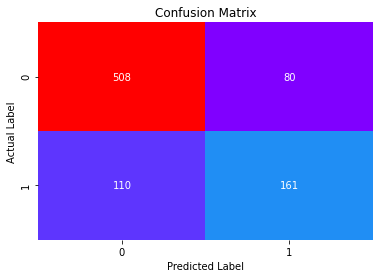

In [110]:
confusion_matrix(y_test, y_test_predict_dt)
sns.heatmap(confusion_matrix(y_test, y_test_predict_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

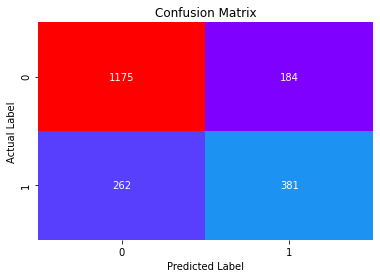

In [111]:
confusion_matrix(y_train, y_train_predict_dt)
sns.heatmap(confusion_matrix(y_train, y_train_predict_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [112]:
cart_train_acc_dt = reg_dt_model.score(X_train,y_train)
cart_train_acc_dt

0.7772227772227772

In [113]:
cart_test_acc_dt = reg_dt_model.score(X_test,y_test)
cart_test_acc_dt

0.7788125727590222

In [114]:
print(classification_report(y_train,y_train_predict_dt))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1359
           1       0.67      0.59      0.63       643

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.77      0.78      0.77      2002



In [115]:
print(classification_report(y_test,y_test_predict_dt))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       588
           1       0.67      0.59      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.77      0.78      0.78       859



In [116]:
cart_metrics_dt=classification_report(y_train, y_train_predict_dt,output_dict=True)
df=pd.DataFrame(cart_metrics_dt).transpose()
cart_train_f1_dt=round(df.loc["1"][2],2)
cart_train_recall_dt=round(df.loc["1"][1],2)
cart_train_precision_dt=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision_dt)
print ('cart_train_recall ',cart_train_recall_dt)
print ('cart_train_f1 ',cart_train_f1_dt)

cart_train_precision  0.67
cart_train_recall  0.59
cart_train_f1  0.63


In [117]:
cart_metrics_dt=classification_report(y_test, y_test_predict_dt,output_dict=True)
df=pd.DataFrame(cart_metrics_dt).transpose()
cart_test_f1_dt=round(df.loc["1"][2],2)
cart_test_recall_dt=round(df.loc["1"][1],2)
cart_test_precision_dt=round(df.loc["1"][0],2)
print ('cart_test_precision ',cart_test_precision_dt)
print ('cart_test_recall ',cart_test_recall_dt)
print ('cart_test_f1 ',cart_test_f1_dt)

cart_test_precision  0.67
cart_test_recall  0.59
cart_test_f1  0.63


AUC: 0.810


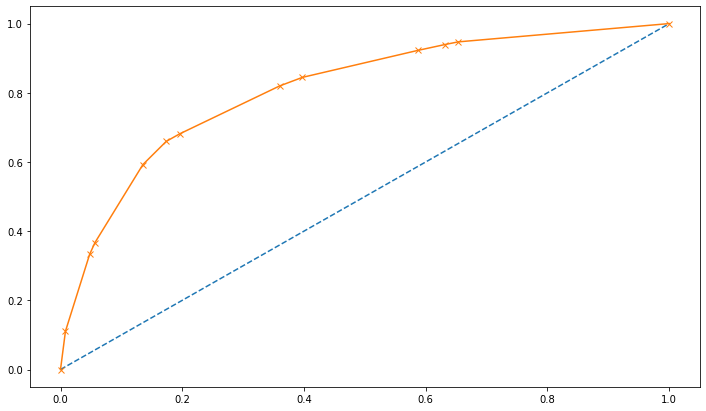

In [118]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

plt.figure(figsize=(12,7))
# calculate AUC
cart_train_auc_dt = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc_dt)


# calculate roc curve
cart_train_fpr_dt, cart_train_tpr_dt, cart_train_thresholds_dt = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr_dt, cart_train_tpr_dt, marker='x')

# show the plot
plt.show()

AUC: 0.803


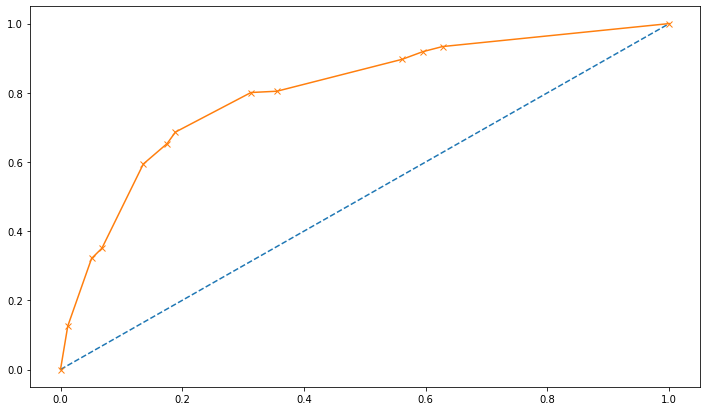

In [119]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

plt.figure(figsize=(12,7))
# calculate AUC
cart_test_auc_dt = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc_dt)

# calculate roc curve
cart_test_fpr_dt, cart_test_tpr_dt, cart_test_thresholds_dt = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr_dt, cart_test_tpr_dt, marker='x')

# show the plot
plt.show()

### Without outliers

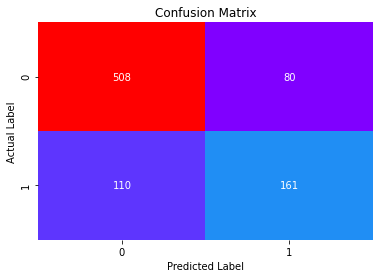

In [120]:
confusion_matrix(y_test_a, y_test_predict_dt_wo)
sns.heatmap(confusion_matrix(y_test_a, y_test_predict_dt_wo),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

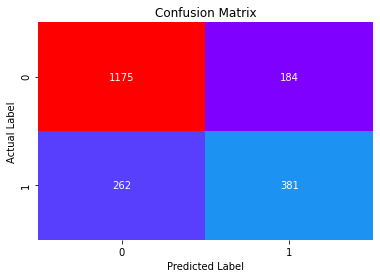

In [121]:
confusion_matrix(y_train_a, y_train_predict_dt_wo)
sns.heatmap(confusion_matrix(y_train_a, y_train_predict_dt_wo),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [122]:
cart_train_acc_dt_wo = reg_dt_model_wo.score(X_train_a,y_train_a)
cart_train_acc_dt_wo

0.7772227772227772

In [123]:
cart_test_acc_dt_wo = reg_dt_model_wo.score(X_test_a,y_test_a)
cart_test_acc_dt_wo

0.7788125727590222

In [124]:
print(classification_report(y_train_a,y_train_predict_dt_wo))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1359
           1       0.67      0.59      0.63       643

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.77      0.78      0.77      2002



In [125]:
print(classification_report(y_test_a,y_test_predict_dt_wo))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       588
           1       0.67      0.59      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.77      0.78      0.78       859



In [126]:
cart_metrics_dt_wo=classification_report(y_train_a, y_train_predict_dt_wo,output_dict=True)
df=pd.DataFrame(cart_metrics_dt_wo).transpose()
cart_train_f1_dt_wo=round(df.loc["1"][2],2)
cart_train_recall_dt_wo=round(df.loc["1"][1],2)
cart_train_precision_dt_wo=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision_dt_wo)
print ('cart_train_recall ',cart_train_recall_dt_wo)
print ('cart_train_f1 ',cart_train_f1_dt_wo)

cart_train_precision  0.67
cart_train_recall  0.59
cart_train_f1  0.63


In [127]:
cart_metrics_dt_wo=classification_report(y_test_a, y_test_predict_dt_wo,output_dict=True)
df=pd.DataFrame(cart_metrics_dt_wo).transpose()
cart_test_f1_dt_wo=round(df.loc["1"][2],2)
cart_test_recall_dt_wo=round(df.loc["1"][1],2)
cart_test_precision_dt_wo=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_test_precision_dt_wo)
print ('cart_train_recall ',cart_test_recall_dt_wo)
print ('cart_train_f1 ',cart_test_f1_dt_wo)

cart_train_precision  0.67
cart_train_recall  0.59
cart_train_f1  0.63


AUC: 0.809


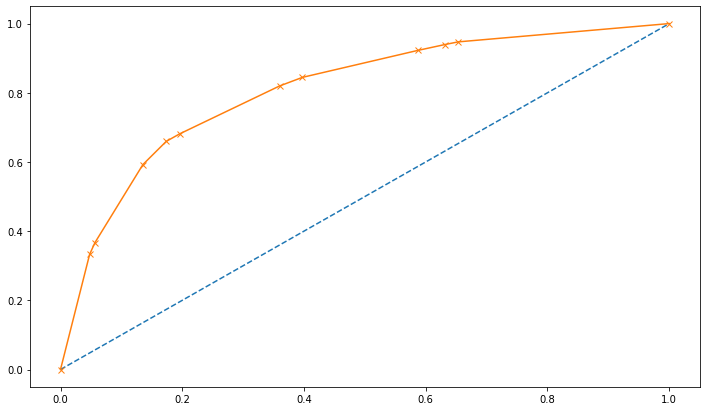

In [128]:
# predict probabilities
probs = reg_dt_model_wo.predict_proba(X_train_a)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

plt.figure(figsize=(12,7))
# calculate AUC
cart_train_auc_dt_wo = roc_auc_score(y_train_a, probs)
print('AUC: %.3f' % cart_train_auc_dt_wo)


# calculate roc curve
cart_train_fpr_dt_wo, cart_train_tpr_dt_wo, cart_train_thresholds_dt_wo = roc_curve(y_train_a, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr_dt_wo, cart_train_tpr_dt_wo, marker='x')

# show the plot
plt.show()

AUC: 0.802


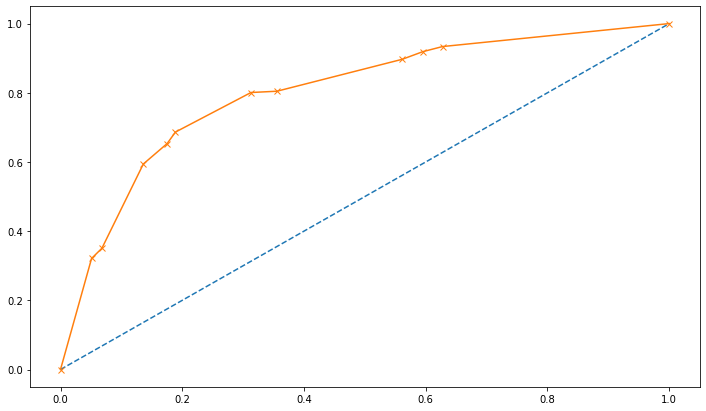

In [129]:
# predict probabilities
probs = reg_dt_model_wo.predict_proba(X_test_a)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

plt.figure(figsize=(12,7))
# calculate AUC
cart_test_auc_dt_wo = roc_auc_score(y_test_a, probs)
print('AUC: %.3f' % cart_test_auc_dt_wo)

# calculate roc curve
cart_test_fpr_dt_wo, cart_test_tpr_dt_wo, cart_test_thresholds_dt_wo = roc_curve(y_test_a, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr_dt_wo, cart_test_tpr_dt_wo, marker='x')

# show the plot
plt.show()

# RANDOM FOREST CLASSIFIER

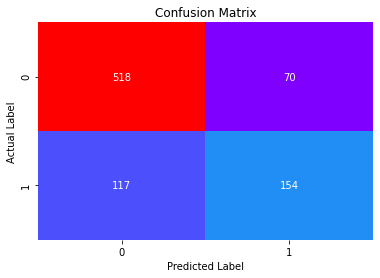

In [130]:
confusion_matrix(y_test, y_test_predict_rf)
sns.heatmap(confusion_matrix(y_test, y_test_predict_rf),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

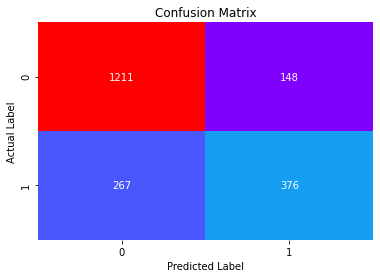

In [131]:
confusion_matrix(y_train, y_train_predict_rf)
sns.heatmap(confusion_matrix(y_train, y_train_predict_rf),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [132]:
cart_train_acc_rf = reg_rf_model.score(X_train,y_train)
cart_train_acc_rf

0.7927072927072927

In [133]:
cart_test_acc_rf = reg_rf_model.score(X_test,y_test)
cart_test_acc_rf

0.7823050058207218

In [134]:
print(classification_report(y_train,y_train_predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.72      0.58      0.64       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [135]:
print(classification_report(y_test,y_test_predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.69      0.57      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.78      0.78      0.78       859



In [136]:
cart_metrics_rf=classification_report(y_train, y_train_predict_rf,output_dict=True)
df=pd.DataFrame(cart_metrics_rf).transpose()
cart_train_f1_rf=round(df.loc["1"][2],2)
cart_train_recall_rf=round(df.loc["1"][1],2)
cart_train_precision_rf=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision_rf)
print ('cart_train_recall ',cart_train_recall_rf)
print ('cart_train_f1 ',cart_train_f1_rf)

cart_train_precision  0.72
cart_train_recall  0.58
cart_train_f1  0.64


In [137]:
cart_metrics_rf=classification_report(y_test, y_test_predict_rf,output_dict=True)
df=pd.DataFrame(cart_metrics_rf).transpose()
cart_test_f1_rf=round(df.loc["1"][2],2)
cart_test_recall_rf=round(df.loc["1"][1],2)
cart_test_precision_rf=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_test_precision_rf)
print ('cart_train_recall ',cart_test_recall_rf)
print ('cart_train_f1 ',cart_test_f1_rf)

cart_train_precision  0.69
cart_train_recall  0.57
cart_train_f1  0.62


AUC: 0.851


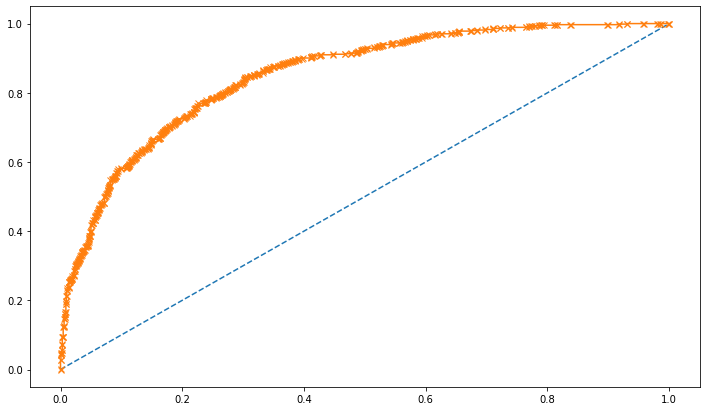

In [138]:
# predict probabilities
probs = reg_rf_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

plt.figure(figsize=(12,7))
# calculate AUC
cart_train_auc_rf = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc_rf)

# calculate roc curve
cart_train_fpr_rf, cart_train_tpr_rf, cart_train_thresholds_rf = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr_rf, cart_train_tpr_rf, marker='x')

# show the plot
plt.show()

AUC: 0.814


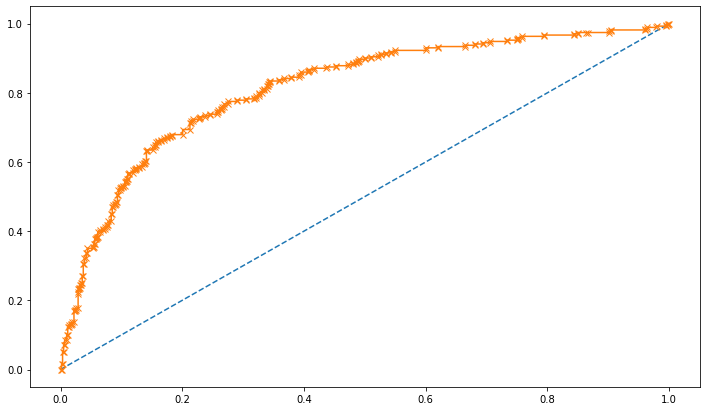

In [139]:
# predict probabilities
probs = reg_rf_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

plt.figure(figsize=(12,7))
# calculate AUC
cart_test_auc_rf = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc_rf)

# calculate roc curve
cart_test_fpr_rf, cart_test_tpr_rf, cart_test_thresholds_rf = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr_rf, cart_test_tpr_rf, marker='x')

# show the plot
plt.show()

### Without outliers

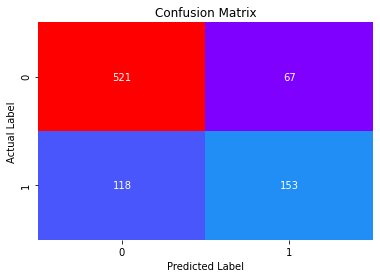

In [140]:
confusion_matrix(y_test_a, y_test_predict_rf_wo)
sns.heatmap(confusion_matrix(y_test_a, y_test_predict_rf_wo),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

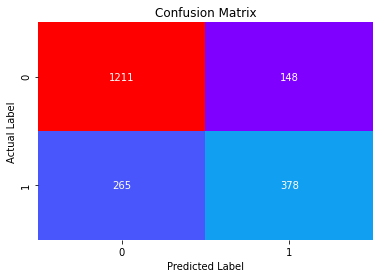

In [141]:
confusion_matrix(y_train_a, y_train_predict_rf_wo)
sns.heatmap(confusion_matrix(y_train_a, y_train_predict_rf_wo),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [142]:
cart_train_acc_rf_wo = reg_rf_model_wo.score(X_train_a,y_train_a)
cart_train_acc_rf_wo

0.7937062937062938

In [143]:
cart_test_acc_rf_wo = reg_rf_model_wo.score(X_test_a,y_test_a)
cart_test_acc_rf_wo

0.7846332945285215

In [144]:
print(classification_report(y_train_a,y_train_predict_rf_wo))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.72      0.59      0.65       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [145]:
print(classification_report(y_test_a,y_test_predict_rf_wo))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.70      0.56      0.62       271

    accuracy                           0.78       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [146]:
cart_metrics_rf_wo=classification_report(y_train_a, y_train_predict_rf_wo,output_dict=True)
df=pd.DataFrame(cart_metrics_rf_wo).transpose()
cart_train_f1_rf_wo=round(df.loc["1"][2],2)
cart_train_recall_rf_wo=round(df.loc["1"][1],2)
cart_train_precision_rf_wo=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision_rf_wo)
print ('cart_train_recall ',cart_train_recall_rf_wo)
print ('cart_train_f1 ',cart_train_f1_rf_wo)

cart_train_precision  0.72
cart_train_recall  0.59
cart_train_f1  0.65


In [147]:
cart_metrics_rf_wo=classification_report(y_test_a, y_test_predict_rf_wo,output_dict=True)
df=pd.DataFrame(cart_metrics_rf_wo).transpose()
cart_test_f1_rf_wo=round(df.loc["1"][2],2)
cart_test_recall_rf_wo=round(df.loc["1"][1],2)
cart_test_precision_rf_wo=round(df.loc["1"][0],2)
print ('cart_test_precision ',cart_test_precision_rf_wo)
print ('cart_test_recall ',cart_test_recall_rf_wo)
print ('cart_test_f1 ',cart_test_f1_rf_wo)

cart_test_precision  0.7
cart_test_recall  0.56
cart_test_f1  0.62


AUC: 0.850


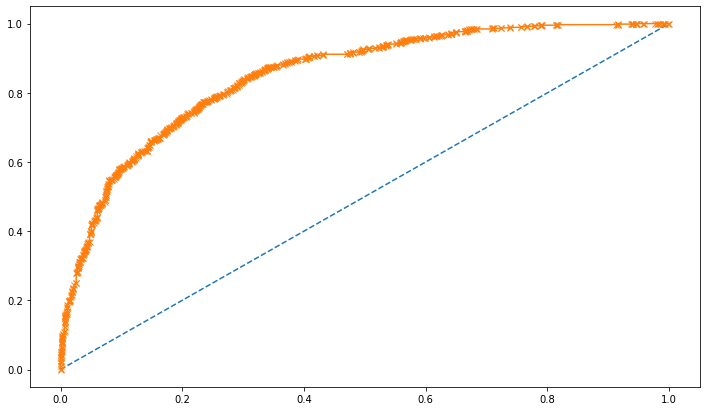

In [148]:
# predict probabilities
probs = reg_rf_model_wo.predict_proba(X_train_a)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

plt.figure(figsize=(12,7))
# calculate AUC
cart_train_auc_rf_wo = roc_auc_score(y_train_a, probs)
print('AUC: %.3f' % cart_train_auc_rf_wo)


# calculate roc curve
cart_train_fpr_rf_wo, cart_train_tpr_rf_wo, cart_train_thresholds_rf_wo = roc_curve(y_train_a, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr_rf_wo, cart_train_tpr_rf_wo, marker='x')

# show the plot
plt.show()

AUC: 0.813


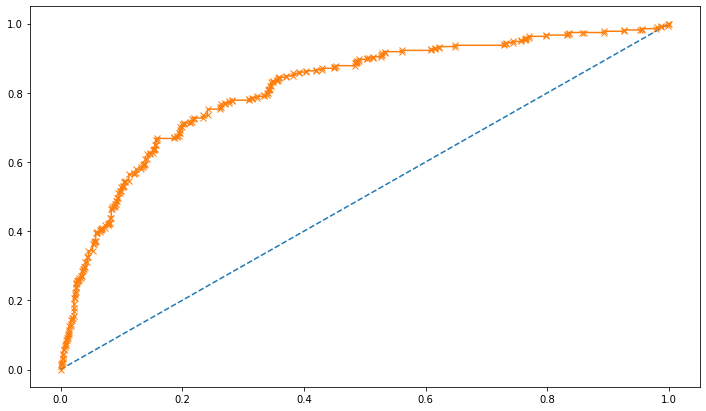

In [149]:
# predict probabilities
probs = reg_rf_model_wo.predict_proba(X_test_a)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

plt.figure(figsize=(12,7))
# calculate AUC
cart_test_auc_rf_wo = roc_auc_score(y_test_a, probs)
print('AUC: %.3f' % cart_test_auc_rf_wo)

# calculate roc curve
cart_test_fpr_rf_wo, cart_test_tpr_rf_wo, cart_test_thresholds_rf_wo = roc_curve(y_test_a, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr_rf_wo, cart_test_tpr_rf_wo, marker='x')

# show the plot
plt.show()

# MLP CLASSIFIER (ARTIFICIAL NEURAL NETWORK)

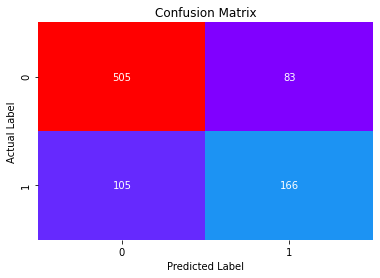

In [150]:
confusion_matrix(y_test_a, y_pred)
sns.heatmap(confusion_matrix(y_test_a, y_pred),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

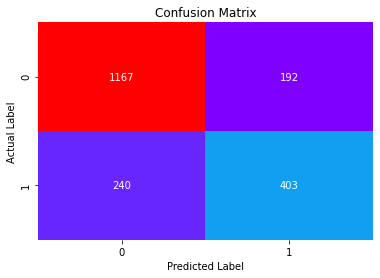

In [151]:
confusion_matrix(y_train_a, y_pred_2)
sns.heatmap(confusion_matrix(y_train_a, y_pred_2),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [152]:
mlp_train_acc = clf.score(X_train_mlp,y_train_a)
mlp_train_acc

0.7842157842157842

In [153]:
mlp_test_acc = clf.score(X_test_mlp,y_test_a)
mlp_test_acc

0.7811408614668219

In [154]:
print(classification_report(y_test_a,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       588
           1       0.67      0.61      0.64       271

    accuracy                           0.78       859
   macro avg       0.75      0.74      0.74       859
weighted avg       0.78      0.78      0.78       859



In [155]:
print(classification_report(y_train_a,y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1359
           1       0.68      0.63      0.65       643

    accuracy                           0.78      2002
   macro avg       0.75      0.74      0.75      2002
weighted avg       0.78      0.78      0.78      2002



In [156]:
mlp_metrics=classification_report(y_train, y_pred_2,output_dict=True)
df=pd.DataFrame(mlp_metrics).transpose()
mlp_train_f1=round(df.loc["1"][2],2)
mlp_train_recall=round(df.loc["1"][1],2)
mlp_train_precision=round(df.loc["1"][0],2)
print ('mlp_train_precision ',mlp_train_precision)
print ('mlp_train_recall ',mlp_train_recall)
print ('mlp_train_f1 ',mlp_train_f1)

mlp_train_precision  0.68
mlp_train_recall  0.63
mlp_train_f1  0.65


In [157]:
mlp_metrics=classification_report(y_test, y_pred,output_dict=True)
df=pd.DataFrame(mlp_metrics).transpose()
mlp_test_f1=round(df.loc["1"][2],2)
mlp_test_recall=round(df.loc["1"][1],2)
mlp_test_precision=round(df.loc["1"][0],2)
print ('mlp_test_precision ',mlp_test_precision)
print ('mlp_test_recall ',mlp_test_recall)
print ('mlp_test_f1 ',mlp_test_f1)

mlp_test_precision  0.67
mlp_test_recall  0.61
mlp_test_f1  0.64


AUC: 0.841


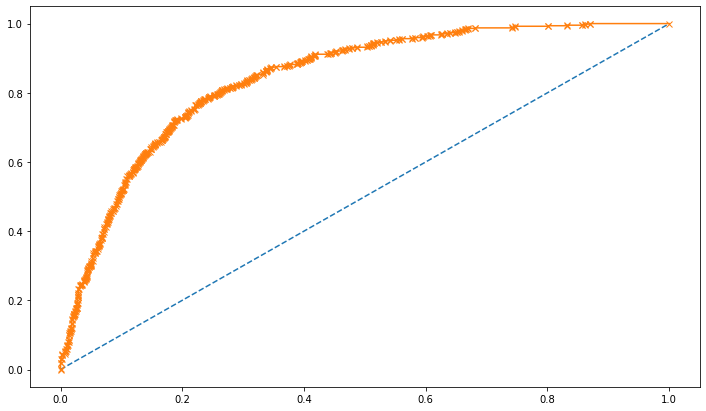

In [158]:
# predict probabilities
probs = clf.predict_proba(X_train_mlp)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

plt.figure(figsize=(12,7))
# calculate AUC
mlp_train_auc = roc_auc_score(y_train_a, probs)
print('AUC: %.3f' % mlp_train_auc)

# calculate roc curve
mlp_train_fpr, mlp_train_tpr, mlp_train_thresholds = roc_curve(y_train_a, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(mlp_train_fpr, mlp_train_tpr, marker='x')

# show the plot
plt.show()

AUC: 0.809


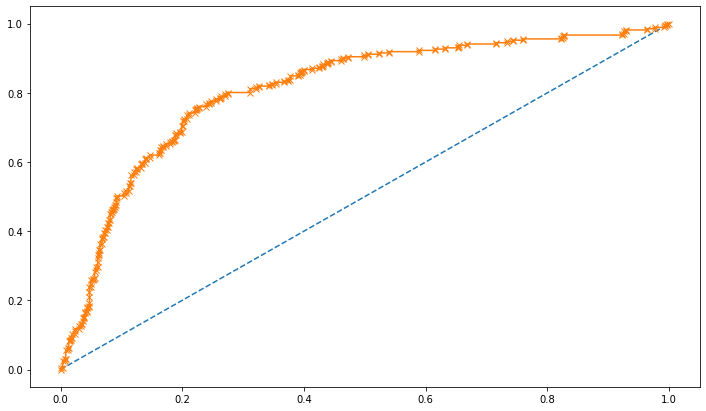

In [159]:
# predict probabilities
probs = clf.predict_proba(X_test_mlp)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

plt.figure(figsize=(12,7))
# calculate AUC
mlp_test_auc = roc_auc_score(y_test_a, probs)
print('AUC: %.3f' % mlp_test_auc)

# calculate roc curve
mlp_test_fpr, mlp_test_tpr, mlp_test_thresholds = roc_curve(y_test_a, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(mlp_test_fpr, mlp_test_tpr, marker='x')

# show the plot
plt.show()

# 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

In [160]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Decision Tree Train With Outliers':[cart_train_acc_dt,cart_train_auc_dt,cart_train_recall_dt,cart_train_precision_dt,cart_train_f1_dt],
        'Decision Tree Test With Outliers':[cart_test_acc_dt,cart_test_auc_dt,cart_test_recall_dt,cart_test_precision_dt,cart_test_f1_dt],
        'Decision Tree Train Without Outliers':[cart_train_acc_dt_wo,cart_train_auc_dt_wo,cart_train_recall_dt_wo,cart_train_precision_dt_wo,cart_train_f1_dt_wo],
        'Decision Tree Test Without Outliers':[cart_test_acc_dt_wo,cart_test_auc_dt_wo,cart_test_recall_dt_wo,cart_test_precision_dt_wo,cart_test_f1_dt_wo],                        
       'Random Forest Train With Outliers':[cart_train_acc_rf,cart_train_auc_rf,cart_train_recall_rf,cart_train_precision_rf,cart_train_f1_rf],
        'Random Forest Test With Outliers':[cart_train_acc_rf,cart_train_auc_rf,cart_train_recall_rf,cart_train_precision_rf,cart_train_f1_rf],
        'Random Forest Train Without Outliers':[cart_train_acc_rf_wo,cart_train_auc_rf_wo,cart_train_recall_rf_wo,cart_train_precision_rf_wo,cart_train_f1_rf_wo],
        'Random Forest Test Without Outliers':[cart_test_acc_rf_wo,cart_test_auc_rf_wo,cart_test_recall_rf_wo,cart_test_precision_rf_wo,cart_test_f1_rf_wo],
       'Neural Network Train Without Outliers':[mlp_train_acc,mlp_train_auc,mlp_train_recall,mlp_train_precision,mlp_train_f1],
        'Neural Network Test Without Outliers':[mlp_test_acc,mlp_test_auc,mlp_test_recall,mlp_test_precision,mlp_test_f1]},index=index)
round(data,2)

,Decision Tree Train With Outliers,Decision Tree Test With Outliers,Decision Tree Train Without Outliers,Decision Tree Test Without Outliers,Random Forest Train With Outliers,Random Forest Test With Outliers,Random Forest Train Without Outliers,Random Forest Test Without Outliers,Neural Network Train Without Outliers,Neural Network Test Without Outliers
Accuracy,0.78,0.78,0.78,0.78,0.79,0.79,0.79,0.78,0.78,0.78
AUC,0.81,0.80,0.81,0.80,0.85,0.85,0.85,0.81,0.84,0.81
Recall,0.59,0.59,0.59,0.59,0.58,0.58,0.59,0.56,0.63,0.61
Precision,0.67,0.67,0.67,0.67,0.72,0.72,0.72,0.70,0.68,0.67
F1 Score,0.63,0.63,0.63,0.63,0.64,0.64,0.65,0.62,0.65,0.64


AUC ROC graph without treating outliers

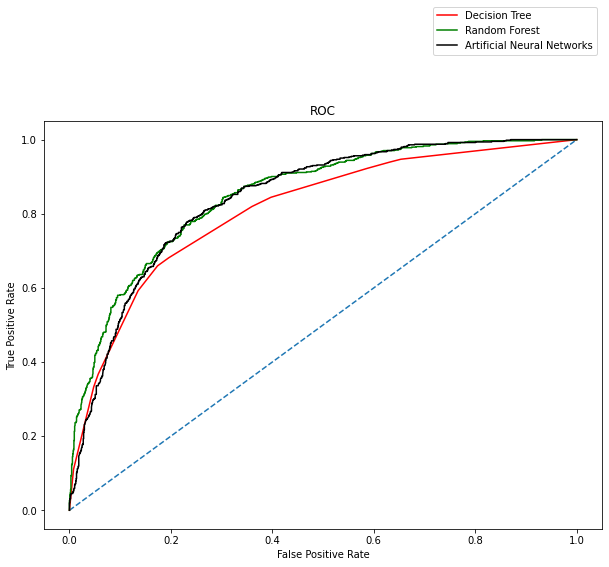

In [161]:
fig,ax = plt.subplots(figsize=(10,7.5)) 

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr_dt, cart_train_tpr_dt,color='red',label="Decision Tree")
plt.plot(cart_train_fpr_rf, cart_train_tpr_rf,color='green',label="Random Forest")
plt.plot(mlp_train_fpr,mlp_train_tpr,color='black',label="Artificial Neural Networks")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Train - with outliers")
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.15, 1., .115), loc='lower right')

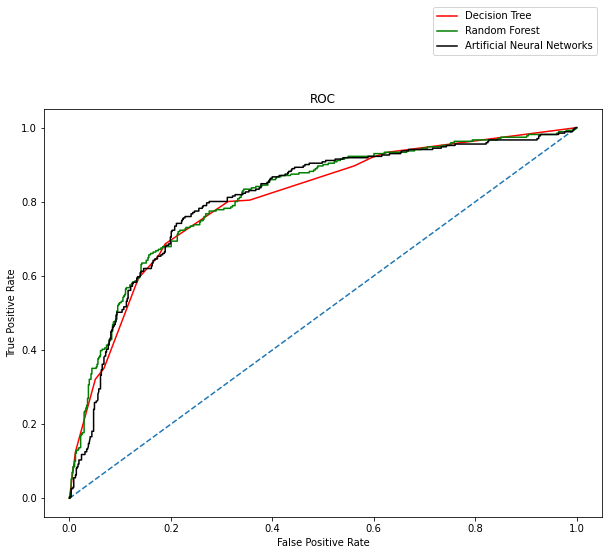

In [162]:
fig,ax = plt.subplots(figsize=(10,7.5)) 
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr_dt, cart_test_tpr_dt,color='red',label="Decision Tree")
plt.plot(cart_test_fpr_rf,cart_test_tpr_rf,color='green',label="Random Forest")
plt.plot(mlp_test_fpr,mlp_test_tpr,color='black',label="Artificial Neural Networks")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.12, 1., .112), loc='lower right')

AUC ROC graph after treating outliers

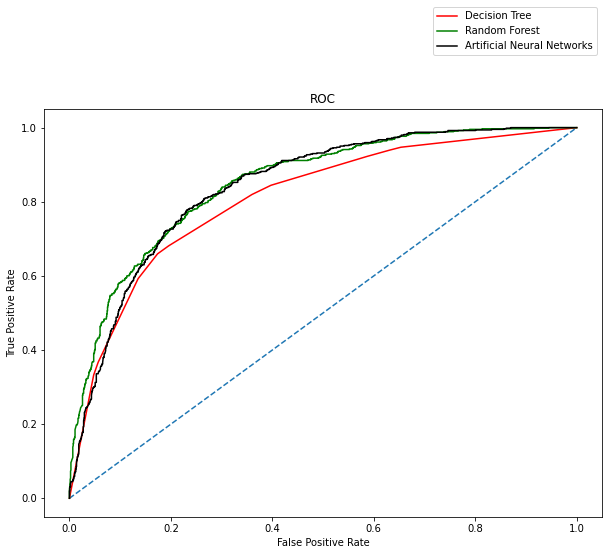

In [163]:
fig,ax = plt.subplots(figsize=(10,7.5)) 
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr_dt_wo, cart_train_tpr_dt_wo,color='red',label="Decision Tree")
plt.plot(cart_train_fpr_rf_wo, cart_train_tpr_rf_wo,color='green',label="Random Forest")
plt.plot(mlp_train_fpr,mlp_train_tpr,color='black',label="Artificial Neural Networks")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.12, 1., .112), loc='lower right')

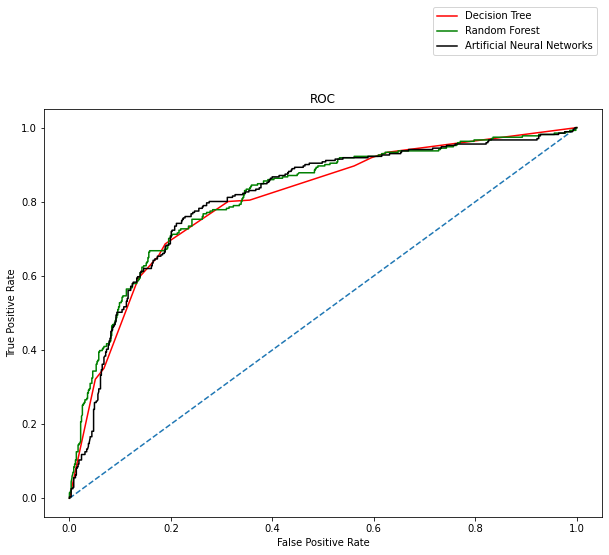

In [164]:
fig,ax = plt.subplots(figsize=(10,7.5)) 
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr_dt_wo, cart_test_tpr_dt_wo,color='red',label="Decision Tree")
plt.plot(cart_test_fpr_rf_wo, cart_test_tpr_rf_wo,color='green',label="Random Forest")
plt.plot(mlp_test_fpr,mlp_test_tpr,color='black',label="Artificial Neural Networks")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(1., 1.12, 0., .112), loc='lower right')